In [ ]:
import random
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from numba import njit, prange
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
from q_lib import *

## Single run of Q-learning

In [ ]:
k = np.linspace(0,1,7)
a, b, c = Q_learner(0.3, 0.95, 500000, k)


In [ ]:
x_values = range(len(b))

# Plot the array as a line graph
plt.plot(x_values, b)
plt.plot(x_values, c)

# Add labels and title
plt.xlabel('thousands')
plt.ylabel('Profitability')
plt.title('Array Graph')
plt.legend(['Player 1', 'Player 2'])

# Display the graph
plt.show()

# n runs of Q-learning

In [ ]:
avg_prof, avg_prof_gain, edge, focal= run_sim_Q(100, np.linspace(0,1,7))

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(9,3))
fig.suptitle("Q-learning: Average profitability in {} different runs, k={} ".format(1000, 6))
axs.set_xlabel("t")
axs.set_ylabel("profitability")
xs = np.linspace(0, 500000, 499)
axs.set_ylim(0.00, 0.125+(0.125*0.05))
axs.hlines(0.125, xmin=xs[0], xmax=xs[-1], colors='red', linestyles='dashed', label='Joint profit maximizing')
axs.hlines(0.0611, xmin=xs[0], xmax=xs[-1], colors='blue', linestyles='dashed', label='Comp Benchmark/edgeworth cycle')#konstant taget fra johanne og morten
axs.plot(xs, avg_prof, color="steelblue", label = "avg. profitability")
#axs.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Show the legend to display the label of the newly added line
axs.legend()  # Show the legend to display the label of the newly added line
plt.show()

## Price cycles

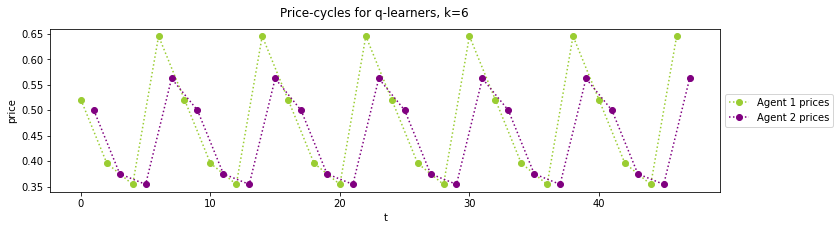

In [11]:
p, b, c = Q_learner(0.3, 0.95, 500000, np.linspace(0,1,49))
p1 = p[0,499950:500000]
p2 = p[1,499950:500000]

plt.figure(figsize=(12, 3))
p0s2d = p1[np.arange(0, p1.size, 2)][:-1]
p1s2d = p2[np.arange(1, p2.size, 2)][:-1]

plt.xlabel("t")
plt.ylabel("price")
plt.suptitle("Price-cycles for q-learners, k=6")

plt.plot(range(0, 48, 2), p0s2d , label="Agent 1 prices", marker="o", color="yellowgreen", linestyle="dotted")
plt.plot(range(1, 48, 2), p1s2d, label="Agent 2 prices", marker="o", color="purple", linestyle="dotted")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Forced deviation

In [7]:
Monk, profits, avg_2pp1,avg2pp2,avg_profitabilities= run_simFD(10,np.linspace(0,1,7))

In [8]:
MAnkA = Monk[0,::2]
MAnkaB = Monk[1,::2]

### Average Price

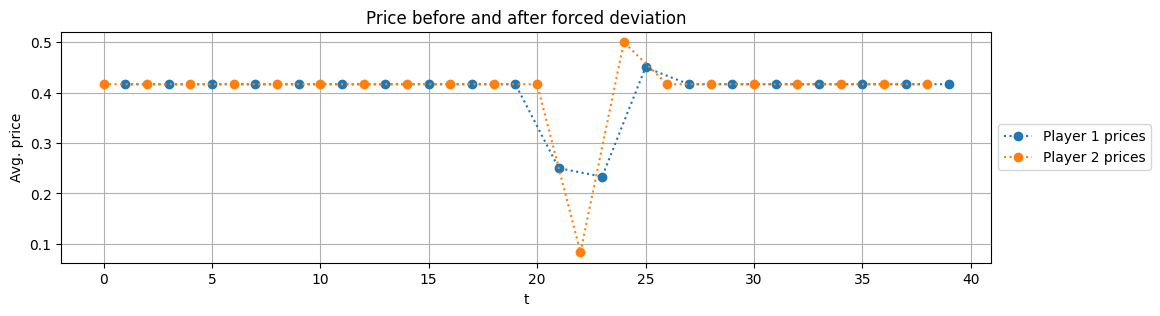

In [9]:
xvalues = range(len(MAnkA[249965:249985]))
#print(p2)
#print(new)
# Plot the array as a line graph
plt.figure(figsize=(12, 3))
plt.plot(range(1,len(xvalues)*2,2), MAnkA[249965:249985], marker="o", linestyle='dotted')
plt.plot(range(0,len(xvalues)*2,2), MAnkaB[249965:249985], marker="o", linestyle='dotted')
#plt.plot(xvalues, p2, marker="o", linestyle='dotted')

# Add labels and title
plt.grid()
plt.xlabel('t')
plt.ylabel('Avg. price')
plt.title('Price before and after forced deviation')
plt.legend(['Player 1 prices', 'Player 2 prices'], bbox_to_anchor=(1,0.5), loc='center left')

# Display the graph
plt.show()

### Average Two-Period Profit

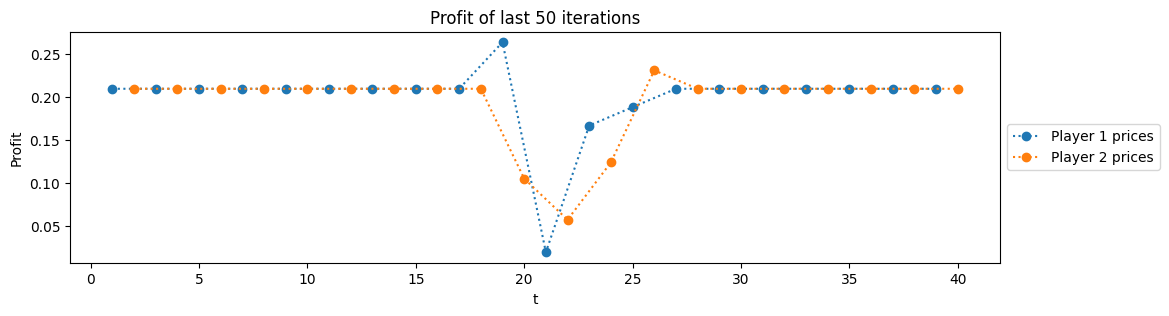

In [10]:
zoom1 = avg_profitabilities[0,249965:249985]
zoom2 = avg_profitabilities[1,249965:249985]
#print("Last 50 prices for player 1: \n", p1)
#print("Last 50 prices for player 2: \n", p2)


xvalues = range(len(zoom1))
plt.figure(figsize=(12, 3))
# Plot the array as a line graph
plt.plot(range(1,len(xvalues)*2,2), zoom1, marker="o", linestyle='dotted')
plt.plot(range(2,len(xvalues)*2+1,2), zoom2, marker="o", linestyle='dotted')

# Add labels and title
plt.xlabel('t')
plt.ylabel('Profit')
plt.title('Profit of last 50 iterations')
plt.legend(['Player 1 prices', 'Player 2 prices'], bbox_to_anchor=(1,0.5), loc='center left')

# Display the graph
plt.show()

In [11]:
done = True
while done:
    a, b, c, d = Klein_simulation_FD(0.3, 0.95, 500000, np.linspace(0,1,7))
    if abs(c[498] - d[498]) < 0.001 and abs(c[497] - d[497]) < 0.001 : 
        done = False

### Average market price

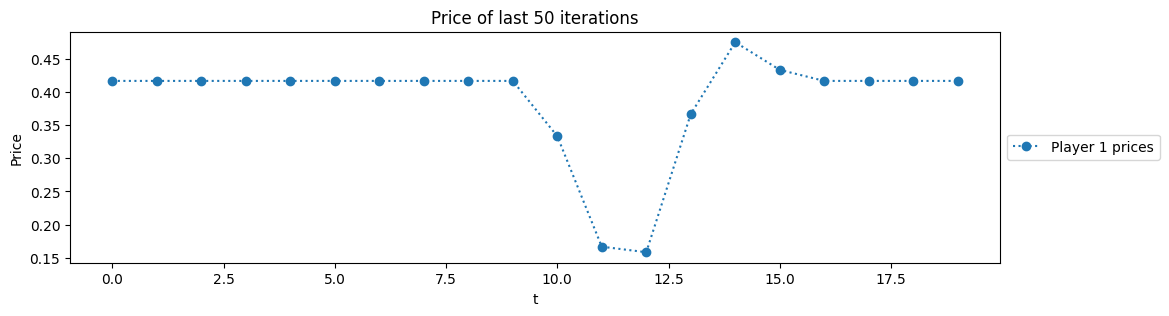

In [12]:
p1 = Monk[0,499940:499960]
p2 = Monk[1,499940:499960]


new=[]
for i in range(len(p1)):
    res=(p1[i]+p2[i])/2
    new.append(res)

xvalues = range(len(new))
plt.figure(figsize=(12, 3))

# Plot the array as a line graph
plt.plot(xvalues, new, marker="o", linestyle='dotted')


# Add labels and title
plt.xlabel('t')
plt.ylabel('Price')
plt.title('Price of last 50 iterations')
plt.legend(['Player 1 prices', 'Player 2 prices'], bbox_to_anchor=(1,0.5), loc='center left')

# Display the graph
plt.show()

## Asymmetric information

In [7]:
p_t, avg_prof1, avgprof2, q1, q2, listo = Q_asym(0.3, 0.95, 500000, np.linspace(0,1,7),0.05)

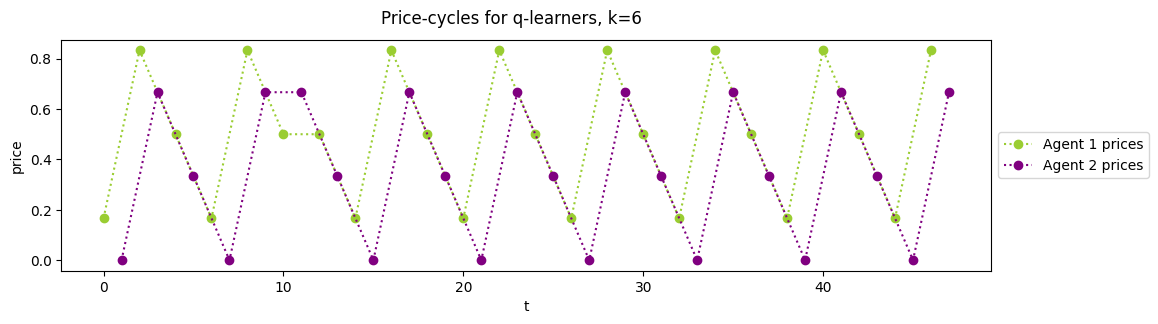

In [9]:
p1 = p_t[0,499100:499150]
p2 = p_t[1,499100:499150]

plt.figure(figsize=(12, 3))
p0s2d = p1[np.arange(0, p1.size, 2)][:-1]
p1s2d = p2[np.arange(1, p2.size, 2)][:-1]

plt.xlabel("t")
plt.ylabel("price")
plt.suptitle("Price-cycles for q-learners, k=6")

plt.plot(range(0, 48, 2), p0s2d , label="Agent 1 prices", marker="o", color="yellowgreen", linestyle="dotted")
plt.plot(range(1, 48, 2), p1s2d, label="Agent 2 prices", marker="o", color="purple", linestyle="dotted")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

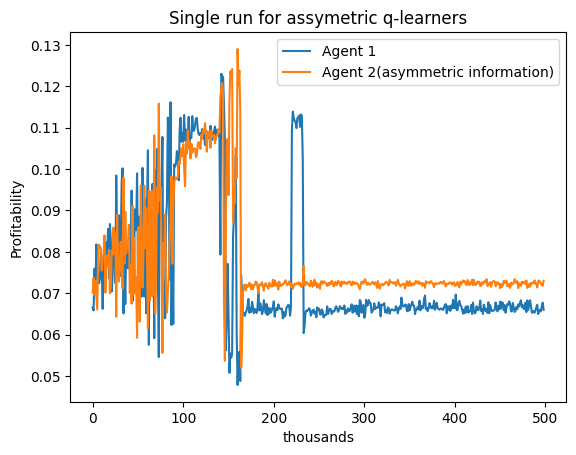

In [10]:
x_values = range(len(avg_prof1))

# Plot the array as a line graph
plt.plot(x_values, avg_prof1)
plt.plot(x_values, avgprof2)

# Add labels and title*
plt.xlabel('thousands')
plt.ylabel('Profitability')
plt.title('Single run for assymetric q-learners')
plt.legend(['Agent 1', 'Agent 2(asymmetric information)'])

# Display the graph
plt.show()

In [5]:
avg_prof, avg_prof_gain, edge, focal= run_sim_Q(100, np.linspace(0,1,7))

In [2]:
avg_prof_asym, avg_prof_gain_asym, edge_asym, focal_asym = run_sim_Q_Asym(100, np.linspace(0, 1, 7), 0.5)

In [8]:
print("Edgeworth price cycles symmetric information: ", edge)
print("Focal price symmetric information: ", focal)
print("Edgeworth price cycles asymmetric information: ", edge_asym)
print("Focal price asymmetric information: ", focal_asym)

Edgeworth price cycles symmetric information:  34
Focal price symmetric information:  66
Edgeworth price cycles asymmetric information:  39
Focal price asymmetric information:  61


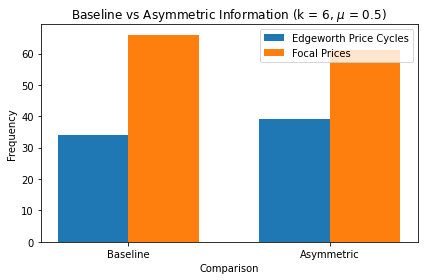

In [10]:
fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.35

# Data for current mu
edgeworth_data = [edge, edge_asym]
focal_data = [focal, focal_asym]

# Plotting
bar1 = ax.bar(index, edgeworth_data, bar_width, label='Edgeworth Price Cycles')
bar2 = ax.bar(index + bar_width, focal_data, bar_width, label='Focal Prices')

# Labels and title
ax.set_xlabel('Comparison')
ax.set_ylabel('Frequency')
ax.set_title(f'Baseline vs Asymmetric Information (k = 6, $\mu$ = 0.5)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Baseline', 'Asymmetric'])
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [13]:
mu_val=[0.0125, 0.025, 0.05, 0.25, 0.5, 0.75, 1]
edge_asym = []
focal_asym = []

for i in mu_val:
    avg_prof_asym, edge_a, focal_a = run_sim_Q_Asym(100, np.linspace(0, 1, 7), i)
    edge_asym.append(edge_a)
    focal_asym.append(focal_a)

ValueError: too many values to unpack (expected 3)

In [29]:
print("mu:" , mu_val)
print("Edgeworth price cycles for values of mu: ", edge_asym)
print("Focal price for values of mu: ", focal_asym)


mu: [2]
Edgeworth price cycles for values of mu:  [92]
Focal price for values of mu:  [8]


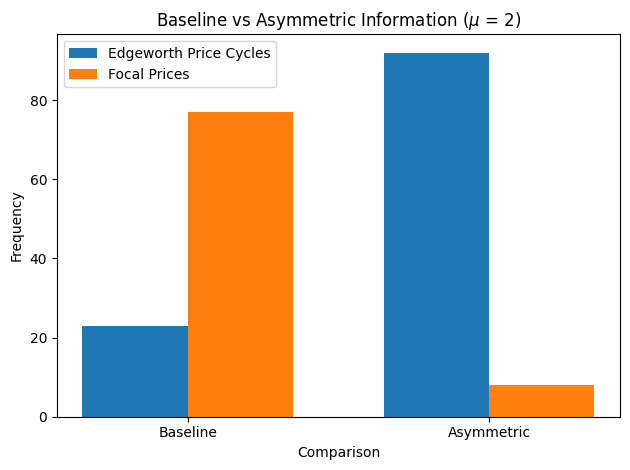

In [30]:
# Plotting each mu value
for i, mu in enumerate(mu_val):
    fig, ax = plt.subplots()
    index = np.arange(2)
    bar_width = 0.35

    # Data for current mu
    edgeworth_data = [edge, edge_asym[i]]
    focal_data = [focal, focal_asym[i]]

    # Plotting
    bar1 = ax.bar(index, edgeworth_data, bar_width, label='Edgeworth Price Cycles')
    bar2 = ax.bar(index + bar_width, focal_data, bar_width, label='Focal Prices')

    # Labels and title
    ax.set_xlabel('Comparison')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Baseline vs Asymmetric Information ($\mu$ = {mu})')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(['Baseline', 'Asymmetric'])
    ax.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()

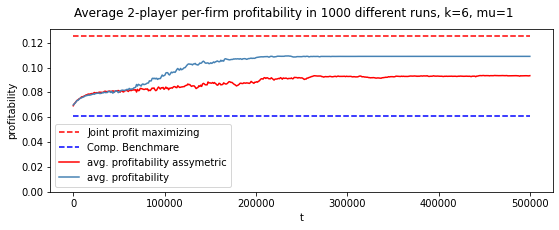

In [14]:
fig, axs = plt.subplots(1, 1, figsize=(9,3))
fig.suptitle("Average 2-player per-firm profitability in {} different runs, k={}, mu={}".format(1000,6, 1))
axs.set_xlabel("t")
axs.set_ylabel("profitability")
xs = np.linspace(0, 500000, 499)
axs.set_ylim(0.00, 0.125+(0.125*0.05))
axs.hlines(0.125, xmin=xs[0], xmax=xs[-1], colors='red', linestyles='dashed', label='Joint profit maximizing')
axs.hlines(0.0611, xmin=xs[0], xmax=xs[-1], colors='blue', linestyles='dashed', label='Comp. Benchmare')#konstant taget fra johanne og morten
axs.plot(xs, avg_prof_asym, color="red", label = "avg. profitability assymetric")
axs.plot(xs,avg_prof,color="steelblue", label ="avg. profitability")

axs.legend()  # Show the legend to display the label of the newly added line
plt.show()

In [15]:
avg_prof_asym[498]

0.09346472222222235

NameError: name 'res1_asym' is not defined

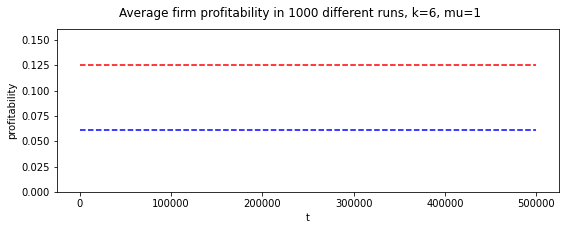

In [16]:
fig, axs = plt.subplots(1, 1, figsize=(9,3))
fig.suptitle("Average firm profitability in {} different runs, k={}, mu={}".format(1000, 6, 1))
axs.set_xlabel("t")
axs.set_ylabel("profitability")
xs = np.linspace(0, 500000, 499)
axs.set_ylim(0.00, 0.155+(0.125*0.05))
axs.hlines(0.125, xmin=xs[0], xmax=xs[-1], colors='red', linestyles='dashed', label='Joint profit maximizing')
axs.hlines(0.0611, xmin=xs[0], xmax=xs[-1], colors='blue', linestyles='dashed', label='Comp Benchmark/edgeworth cycle')#konstant taget fra johanne og morten
axs.plot(xs, res1_asym, color="steelblue", label = "agent1")
axs.plot(xs, res2_asym, color="red", label = "agent 2 (incomplete information)")

axs.legend()  # Show the legend to display the label of the newly added line
plt.show()

In [25]:
res1[498]

0.14957432432432533

### Average profit gain

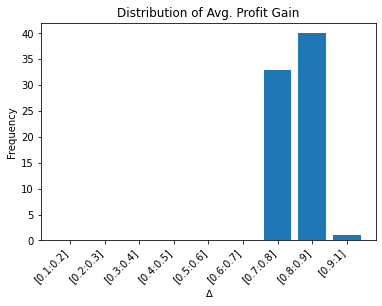

In [17]:
# Define the intervals
intervals = [(0.1, 0.2), (0.2, 0.3), (0.3, 0.4), (0.4, 0.5), (0.5, 0.6), (0.6, 0.7), (0.7, 0.8), (0.8, 0.9), (0.9, 1)]
intervals_str = ['[0.1:0.2]','[0.2:0.3]', '[0.3:0.4]', '[0.4:0.5]', '[0.5:0.6]', '[0.6:0.7]', '[0.7:0.8]', '[0.8:0.9]', '[0.9:1]']

# Initialize an array to store counts for each interval
interval_counts = np.zeros(len(intervals), dtype=int)

# Iterate through the array and count values in each interval
for num in avg_prof_gain:
    for i, interval in enumerate(intervals):
        if interval[0] <= num < interval[1]:
            interval_counts[i] += 1

# Plot the counts for each interval
plt.bar(np.arange(len(intervals)), interval_counts, tick_label=intervals_str)
plt.xticks(rotation=45, ha='right')
plt.xlabel('∆')
plt.ylabel('Frequency')
plt.title('Distribution of Avg. Profit Gain')
plt.show()

In [27]:
liste=[0.0125,0.025,0.05, 0.25, 0.5,0.75,1]
profiterne=[]
denene=[]
denanden=[]

for i in liste:
    avggg, bip, bop = run_sim_Q_Asym(100, np.linspace(0, 1, 7), i)
    profiterne.append(avggg)
    denene.append(bip)
    denanden.append(bop)

    


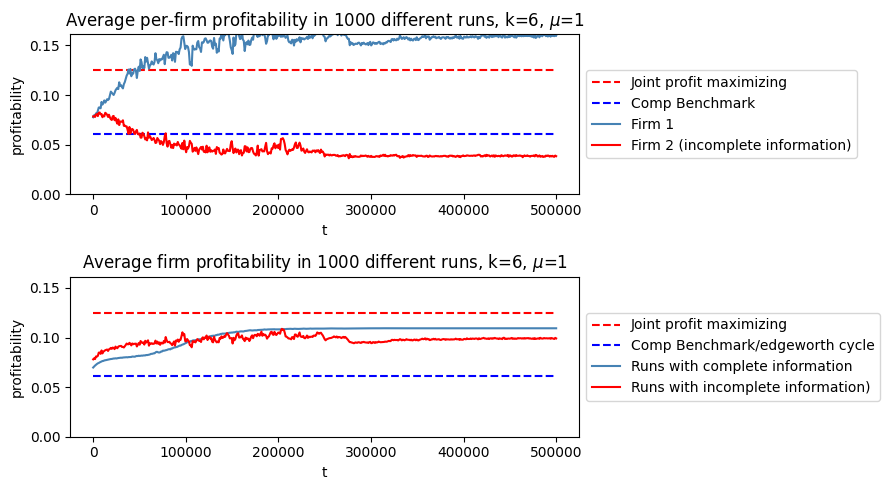

In [30]:
#fig, axs = plt.subplots(2)
test=9


xs = np.linspace(0, 500000, 499)

fig, axs = plt.subplots(2, figsize=(9,5))
axs[0].title.set_text("Average per-firm profitability in {} different runs, k={}, $\mu$={}".format(1000, 6, liste[test]))
axs[0].set_xlabel("t")
axs[0].set_ylabel("profitability")
axs[0].set_ylim(0.00, 0.155+(0.125*0.05))

axs[1].title.set_text("Average firm profitability in {} different runs, k={}, $\mu$={}".format(1000, 6, liste[test]))
axs[1].set_xlabel("t")
axs[1].set_ylabel("profitability")
axs[1].set_ylim(0.00, 0.155+(0.125*0.05))


axs[0].hlines(0.125, xmin=xs[0], xmax=xs[-1], colors='red', linestyles='dashed', label='Joint profit maximizing')
axs[0].hlines(0.0611, xmin=xs[0], xmax=xs[-1], colors='blue', linestyles='dashed', label='Comp Benchmark')#konstant taget fra johanne og morten
axs[0].plot(xs, denene[test], color="steelblue", label = "Firm 1")
axs[0].plot(xs, denanden[test], color="red", label = "Firm 2 (incomplete information)")
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Show the legend to display the label of the newly added line

axs[1].hlines(0.125, xmin=xs[0], xmax=xs[-1], colors='red', linestyles='dashed', label='Joint profit maximizing')
axs[1].hlines(0.0611, xmin=xs[0], xmax=xs[-1], colors='blue', linestyles='dashed', label='Comp Benchmark/edgeworth cycle')#konstant taget fra johanne og morten
axs[1].plot(xs, avg_prof, color="steelblue", label = "Runs with complete information")
axs[1].plot(xs, profiterne[test], color="red", label = "Runs with incomplete information)")
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Show the legend to display the label of the newly added line

plt.tight_layout()
plt.savefig('/Users/nicklasjensen/Desktop/Bachelor/gemteplots/q-learning{}.png'.format(liste[test]))